In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,precision_score, f1_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
file_path='/content/drive/My Drive/Datasets/Telecom Customer churn Dataset.csv'
df=pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Converting Total Charges to Numeric Data Types

In [19]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
print(df['TotalCharges'].dtype)

float64


In [20]:
non_numeric_col=df.select_dtypes(exclude='number')
non_numeric_col

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [21]:
num_categorical_cols = len(df.columns[1:-1])  # Exclude 'customerID' and 'Churn'
print("Number of categorical columns:", num_categorical_cols)

Number of categorical columns: 19


#Missing Values

In [22]:
df.dropna(inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

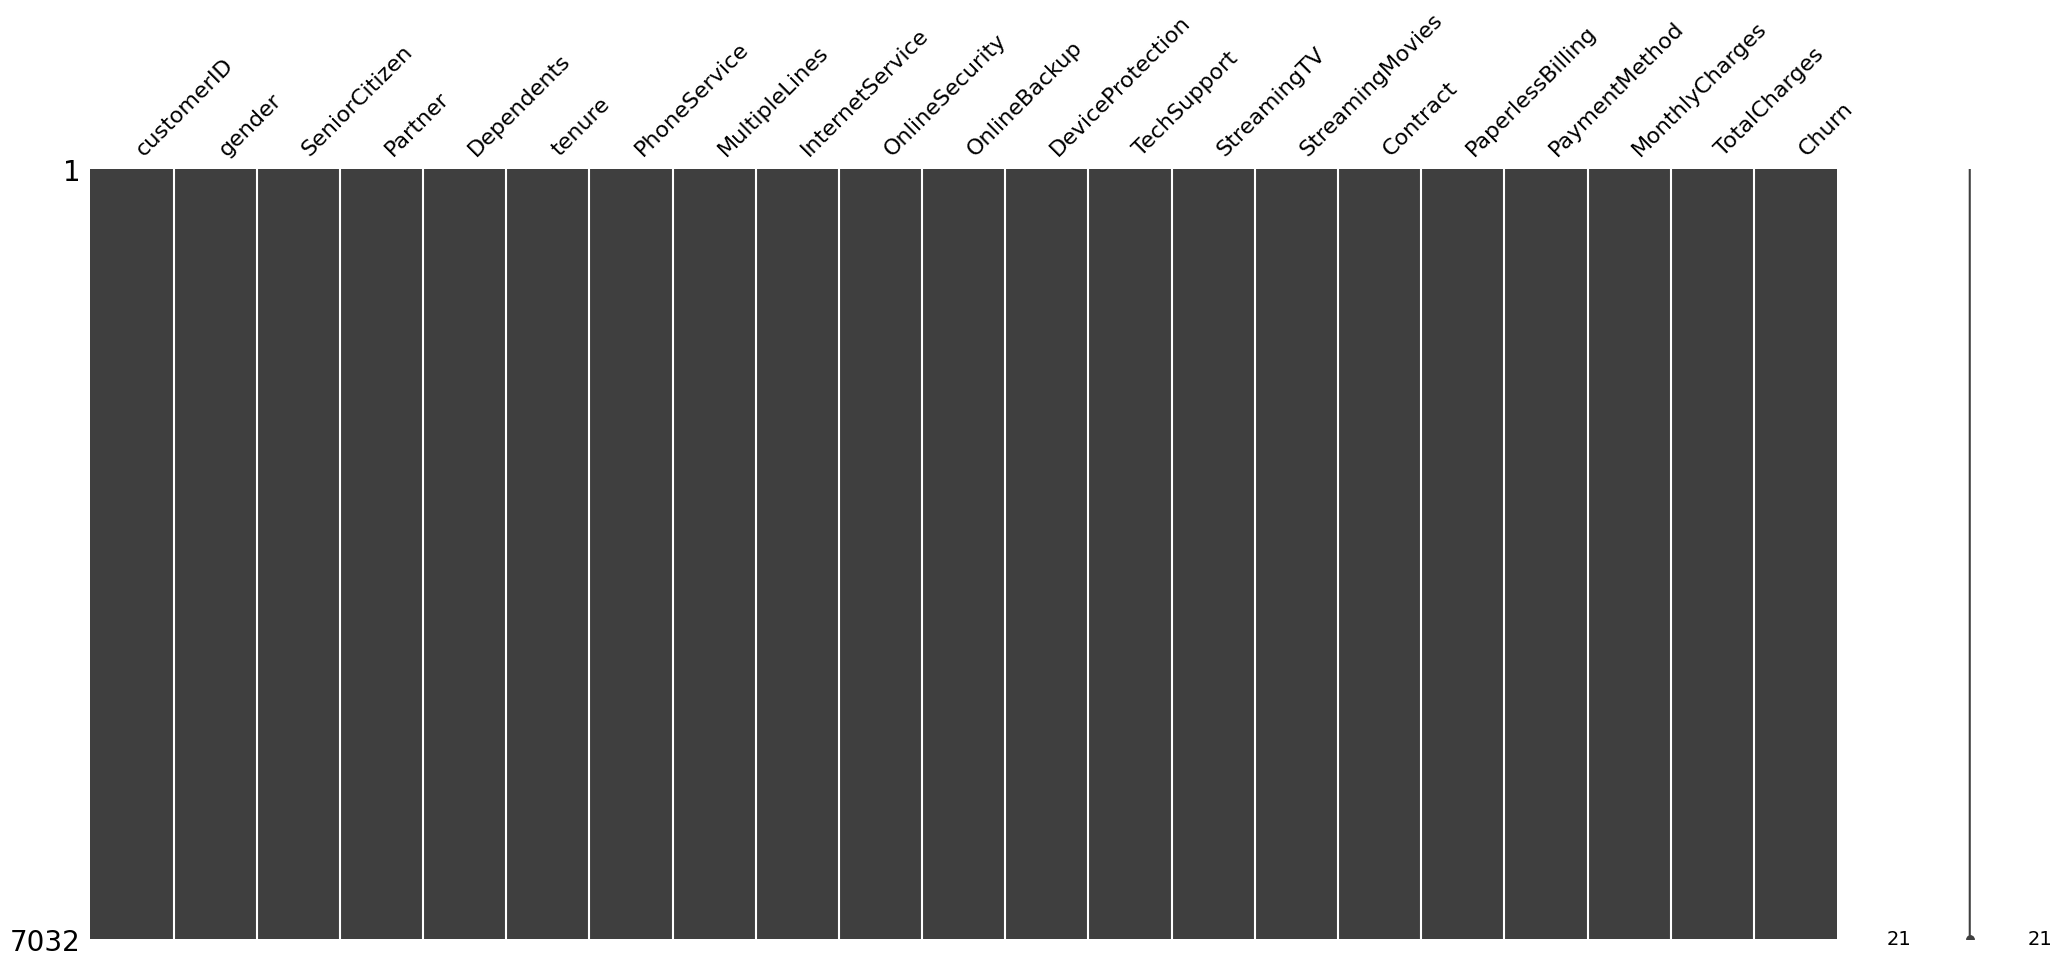

In [23]:
#using missingno lib
import missingno as msno
msno.matrix(df)

#Check for Duplicates

In [24]:
df.duplicated().sum()

0

#Drop Customer ID its of No use

In [25]:
df.drop('customerID', axis=1, inplace=True)

#EDA
Analyzing the distribution of numerical variables i.e tenure, MonthlyCharges, and TotalCharges

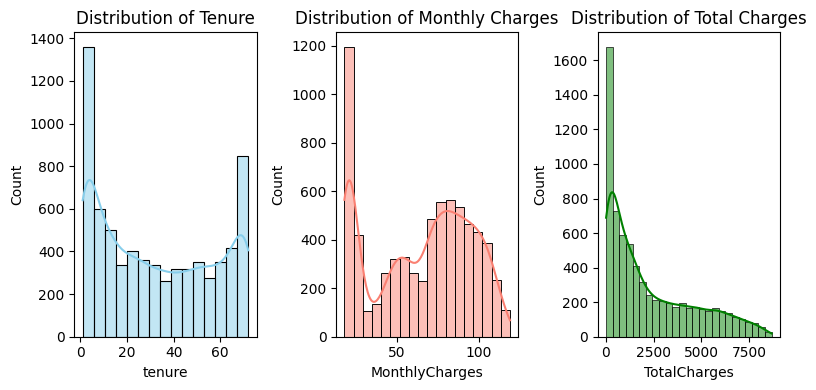

In [26]:
import seaborn as sns
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(8,4))
sns.histplot(df['tenure'],kde=True, ax=axes[0],color='skyblue')
axes[0].set_title('Distribution of Tenure')

sns.histplot(df['MonthlyCharges'],kde=True,ax=axes[1],color='salmon')
axes[1].set_title('Distribution of Monthly Charges')

sns.histplot(df['TotalCharges'],kde=True,ax=axes[2],color='green')
axes[2].set_title('Distribution of Total Charges')


plt.tight_layout()
plt.show()

In [29]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


#One hot encoding for all categorical Cols

In [30]:
df_encoded= pd.get_dummies(df,dtype=int)
df_encoded.head(2)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1


#Correlation between Target Varaible and other varaibles

<Axes: >

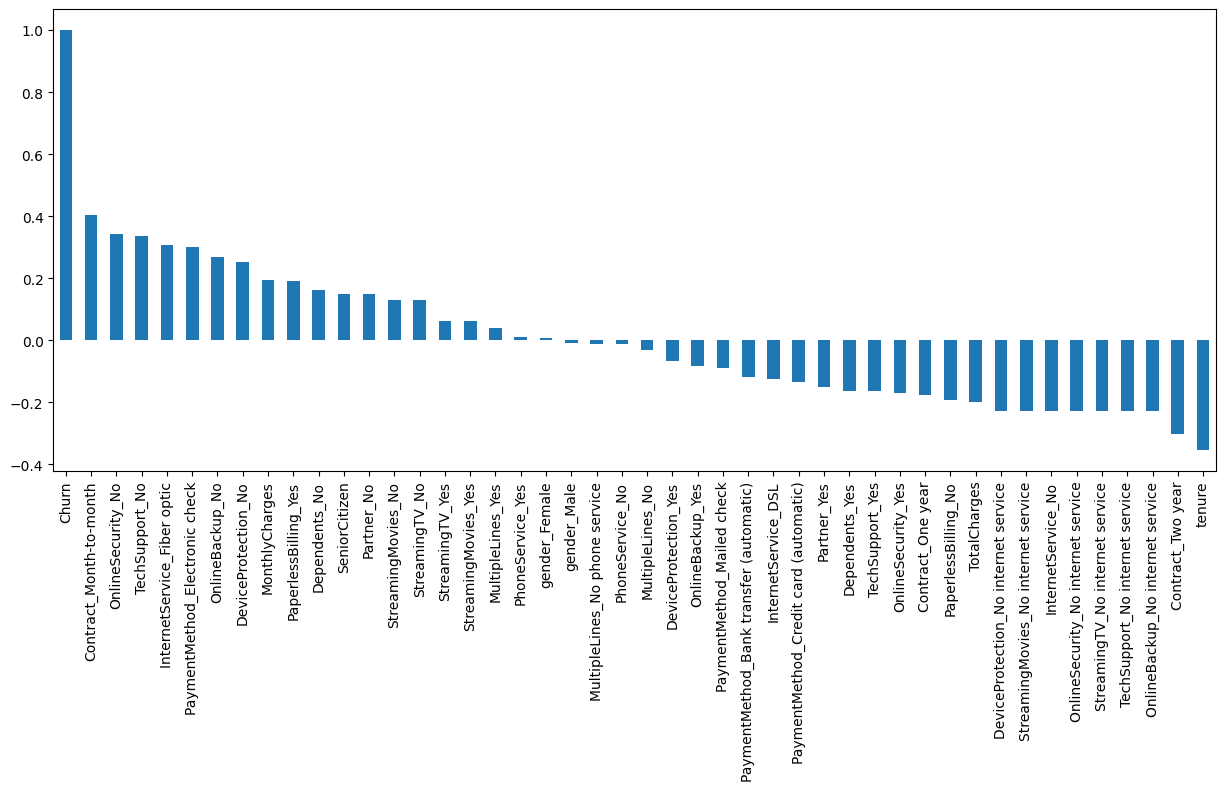

In [35]:
plt.figure(figsize=(15,6))
df_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#Demographics
Gender Percentage

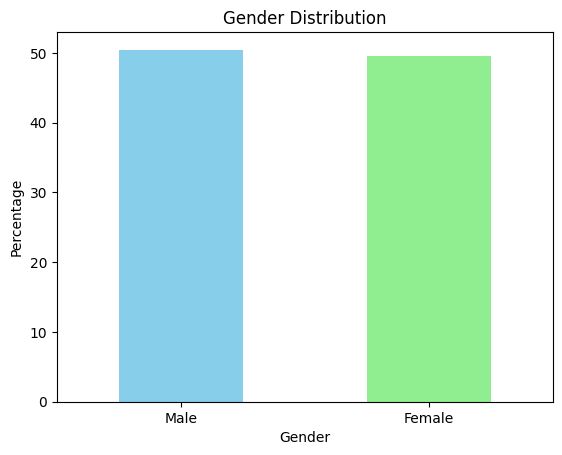

In [41]:
import matplotlib.pyplot as plt

# Calculate the percentage of each gender
gender_distribution = df['gender'].value_counts(normalize=True) * 100

# Plotting the bar chart
gender_distribution.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()


#Senior Citizen

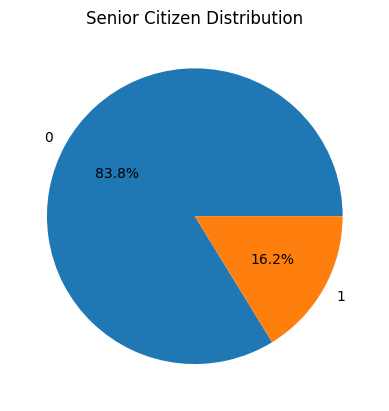

In [46]:
SeniorCitizen_distribution = df['SeniorCitizen'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.pie(SeniorCitizen_distribution, labels=SeniorCitizen_distribution.index, autopct='%1.1f%%')
plt.title('Senior Citizen Distribution')
plt.show()

#customer Account Information

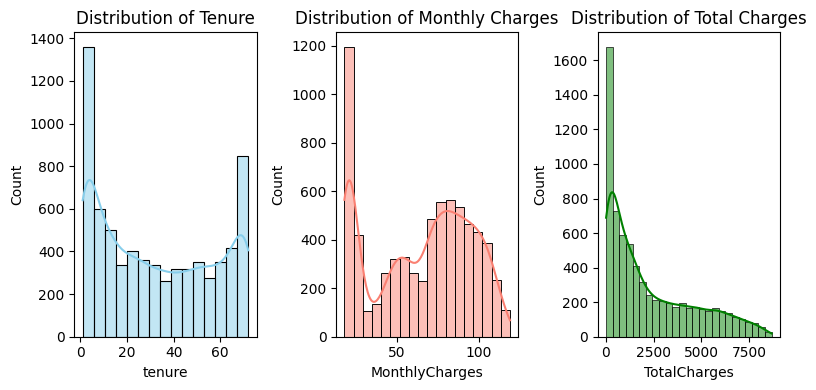

In [47]:
import seaborn as sns
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(8,4))
sns.histplot(df['tenure'],kde=True, ax=axes[0],color='skyblue')
axes[0].set_title('Distribution of Tenure')

sns.histplot(df['MonthlyCharges'],kde=True,ax=axes[1],color='salmon')
axes[1].set_title('Distribution of Monthly Charges')

sns.histplot(df['TotalCharges'],kde=True,ax=axes[2],color='green')
axes[2].set_title('Distribution of Total Charges')


plt.tight_layout()
plt.show()

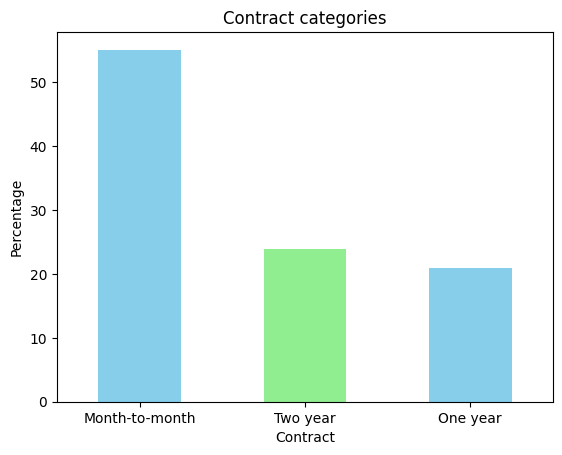

In [91]:

# Calculate the percentage of each customer in all category
gender_distribution = df['Contract'].value_counts(normalize=True) * 100

# Plotting the bar chart
gender_distribution.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Contract categories')
plt.xlabel('Contract')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()

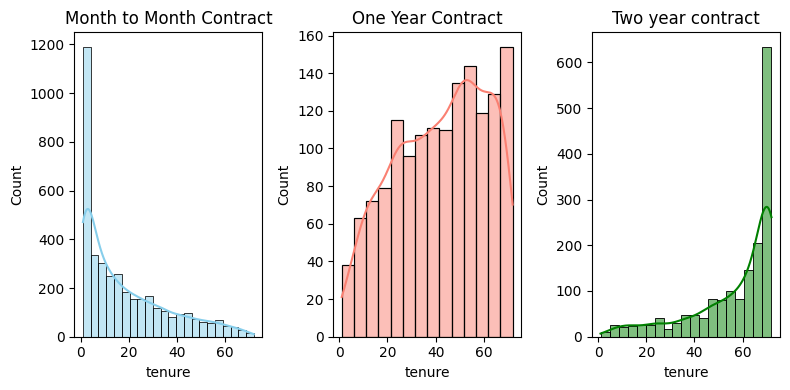

In [52]:
import seaborn as sns
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(8,4))
sns.histplot(df[df['Contract']=='Month-to-month']['tenure'],kde=True, ax=axes[0],color='skyblue')
axes[0].set_title('Month to Month Contract')

sns.histplot(df[df['Contract']=='One year']['tenure'],kde=True,ax=axes[1],color='salmon')
axes[1].set_title('One Year Contract')

sns.histplot(df[df['Contract']=='Two year']['tenure'],kde=True,ax=axes[2],color='green')
axes[2].set_title('Two year contract')


plt.tight_layout()
plt.show()

#Various Services used by customer

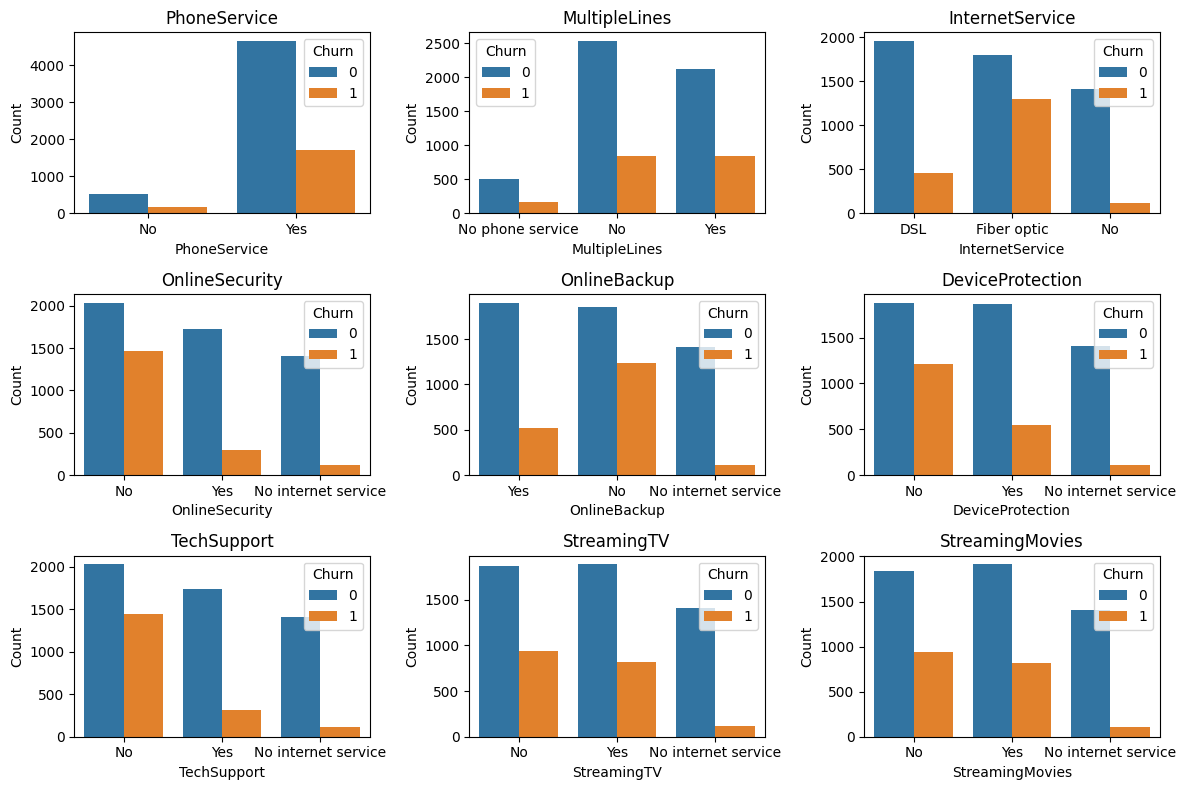

In [59]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(services):
    if i < len(axes):
        sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#Monthly Vs Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

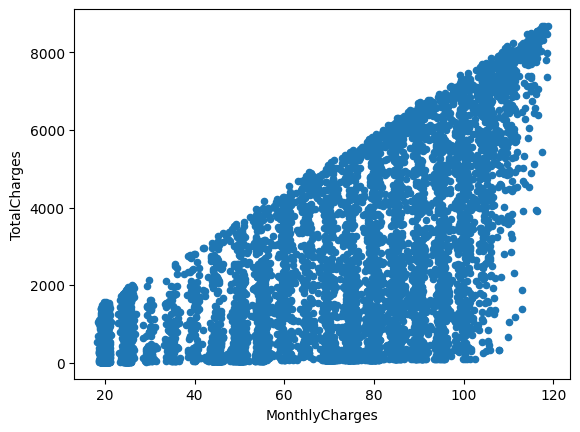

In [60]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y='TotalCharges')

#Explore Important varaible that shows + correlation with target Col
Churn vs tenure

<Axes: xlabel='Churn', ylabel='tenure'>

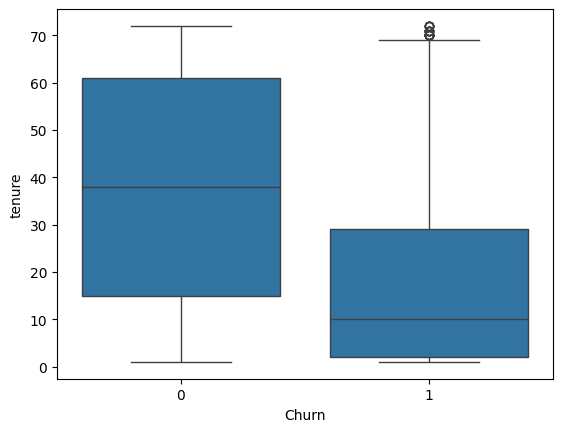

In [61]:
sns.boxplot(x = df.Churn, y = df.tenure)

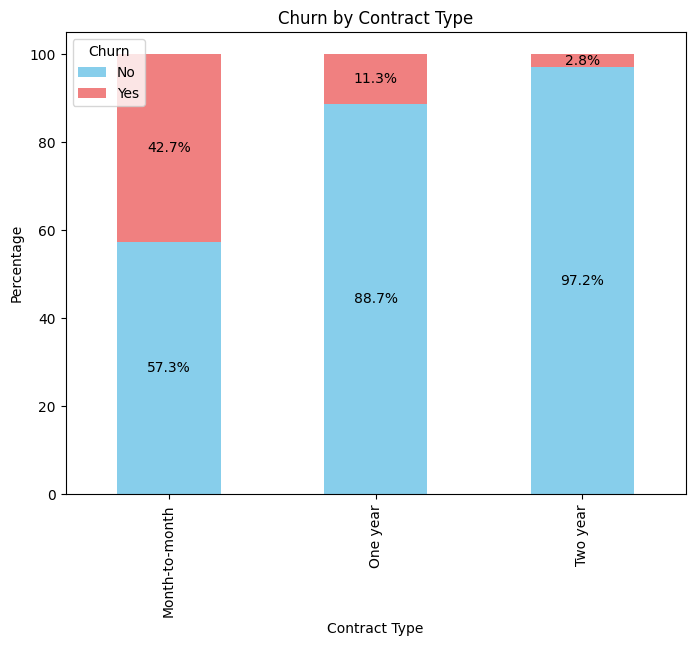

In [69]:
import matplotlib.pyplot as plt

# Calculate the percentage of each Churn category within each Contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

# Plotting the stacked bar chart
ax = contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightcoral'])
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', labels=['No', 'Yes'])

# Annotate each bar with the percentage value
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()


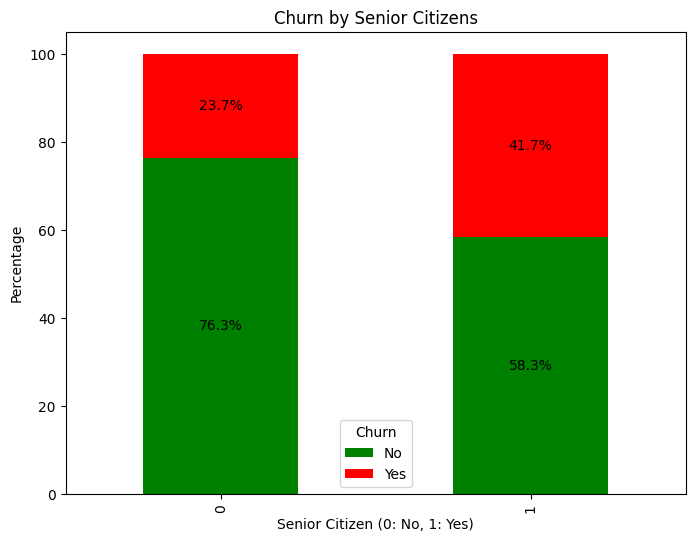

In [71]:
# Calculate the percentage of each Churn category within Senior Citizen
contract_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plotting the stacked bar chart
ax = contract_churn.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])
plt.title('Churn by Senior Citizens')
plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Percentage')
plt.legend(title='Churn', labels=['No', 'Yes'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

<ipython-input-79-d80ab0723d1b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")


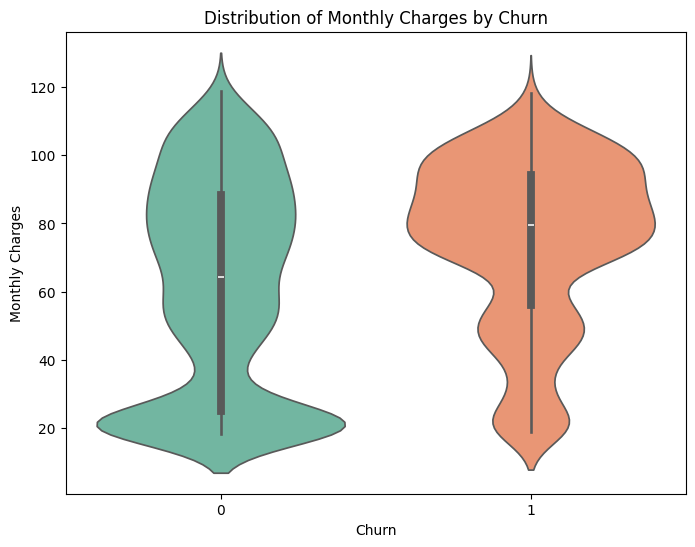

In [79]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette="Set2")
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

#Feature Scaling

In [80]:
#only numeric cols will be scaled as there is no need of categorical cols to scale
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply MinMax scaling to selected columns
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

Drop Target col

In [81]:
from sklearn.model_selection import train_test_split
X=df_encoded.drop('Churn',axis=1)
y=df_encoded['Churn']
y.info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [82]:
X_train,X_test,y_train,y_test=train_test_split(df_encoded,y,test_size=0.2)

#KNN Classifier

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=1)

In [93]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
y_pred = knn.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,precision_score,f1_score
accuracy=accuracy_score(y_test,y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision= precision_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print("Accuracy of the model is : ",accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8848614072494669
Accuracy of the model is :  0.8848614072494669
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1007
           1       0.80      0.80      0.80       400

    accuracy                           0.88      1407
   macro avg       0.86      0.86      0.86      1407
weighted avg       0.89      0.88      0.88      1407



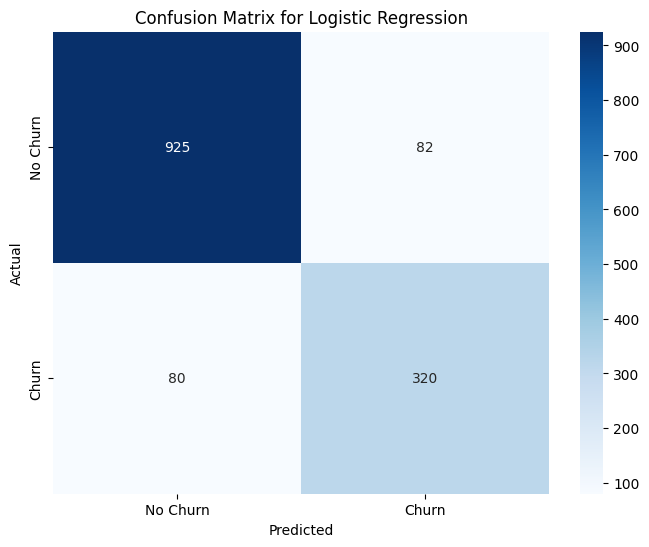

In [96]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()